Available sheets in file: ['Description', 'glass']
Shape : (214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


None


✦ Summary statistics (numeric columns)


,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000



✦ Missing‑value count


,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0



✦ Duplicate rows : 1

✦ Class distribution (target ‘Type’)


,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


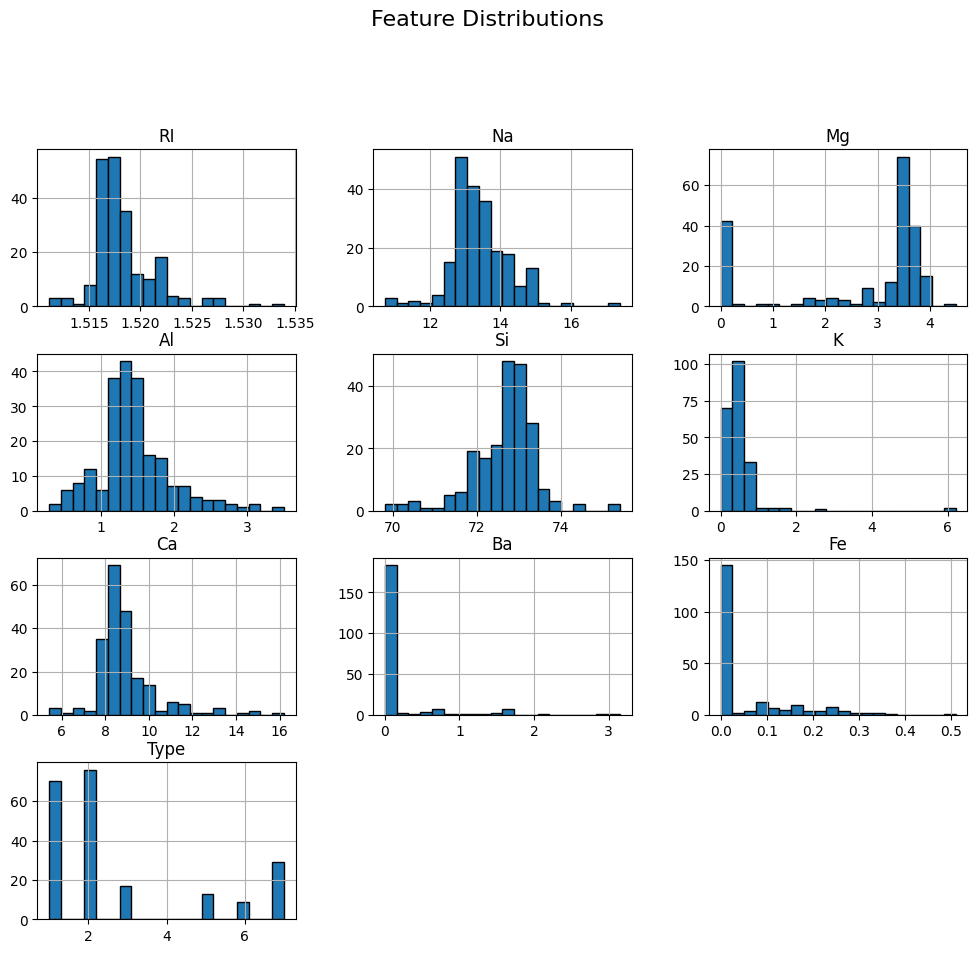

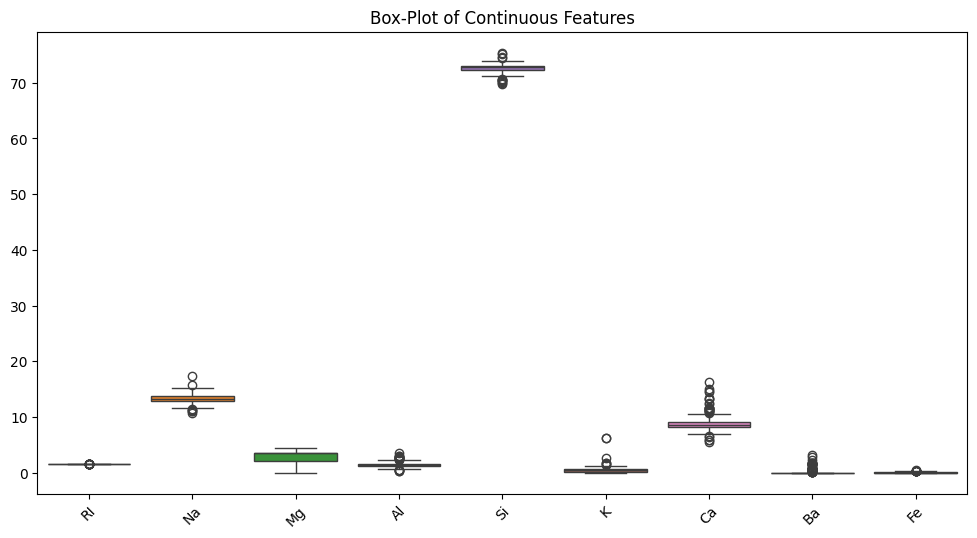

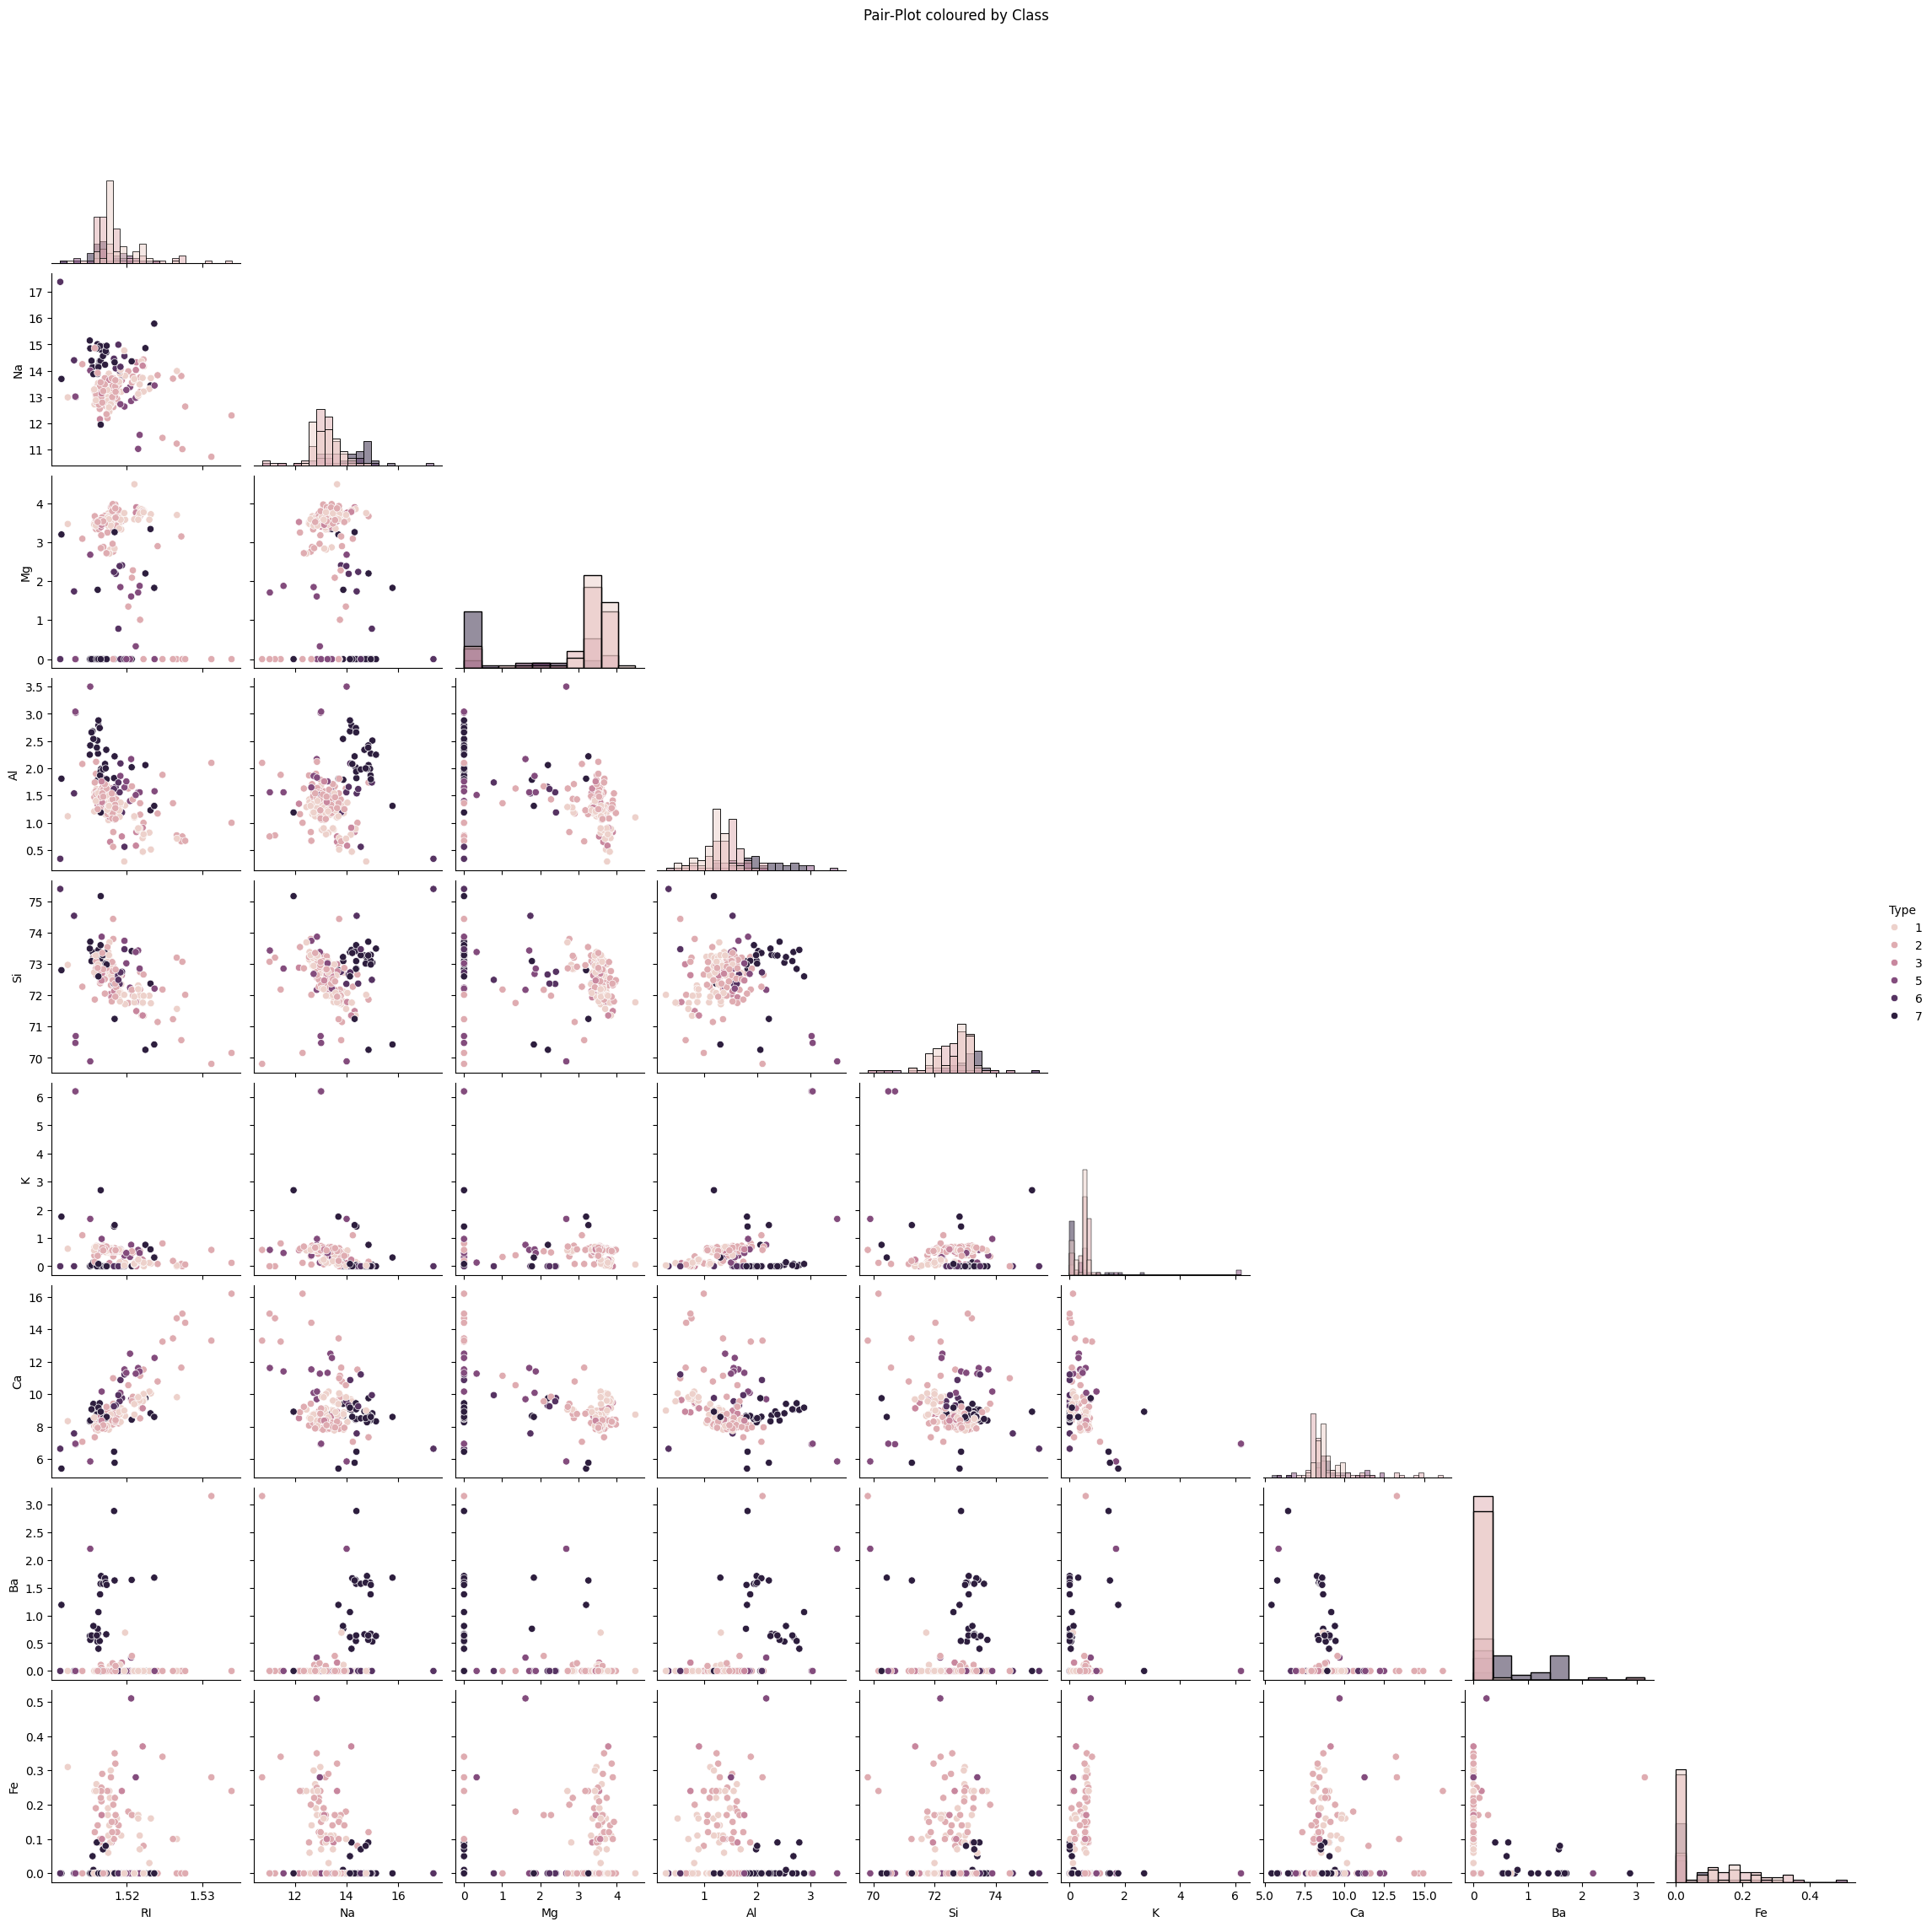

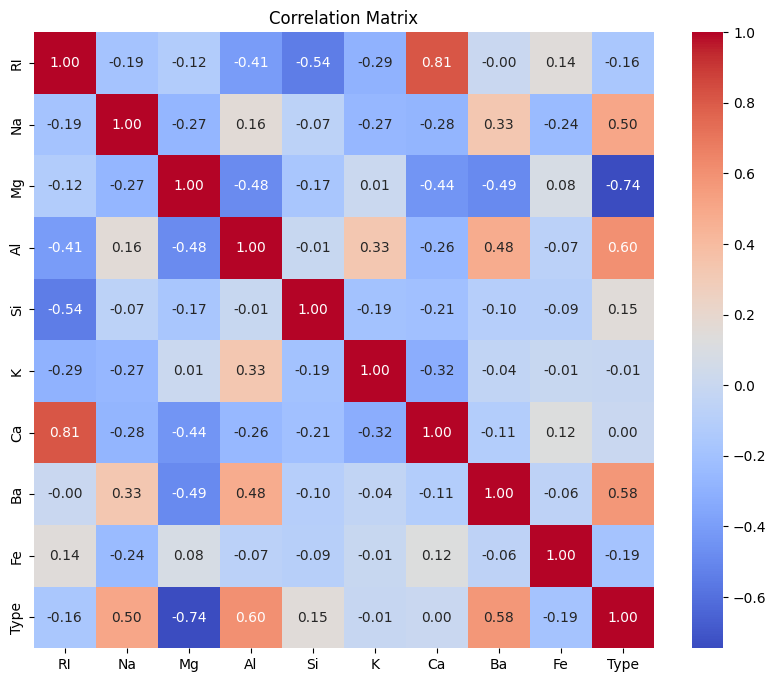

Before SMOTE  : {2: np.int64(61), 1: np.int64(56), 7: np.int64(23), 3: np.int64(14), 5: np.int64(10), 6: np.int64(7)}
After  SMOTE  : {7: np.int64(61), 1: np.int64(61), 2: np.int64(61), 3: np.int64(61), 6: np.int64(61), 5: np.int64(61)}

Random Forest metrics
----------------------------
Accuracy : 0.8140
Precision: 0.8317
Recall   : 0.8140
F1‑score : 0.8161

Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.79      0.81        14
           2       0.79      0.73      0.76        15
           3       0.60      1.00      0.75         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.81        43
   macro avg       0.82      0.89      0.84        43
weighted avg       0.83      0.81      0.82        43



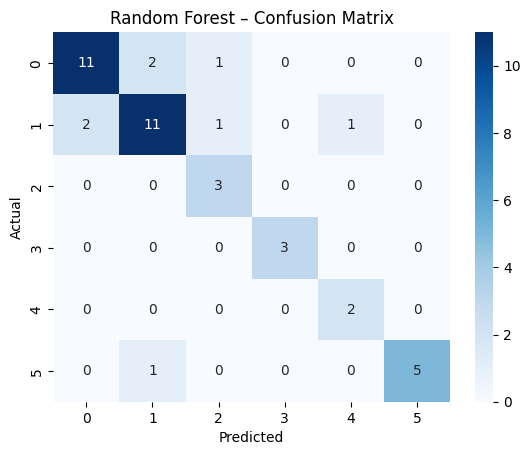


Bagging (Classifier) metrics
----------------------------
Accuracy : 0.7442
Precision: 0.7972
Recall   : 0.7442
F1‑score : 0.7531
OOB score : 0.8661202185792349

AdaBoost metrics
----------------------------
Accuracy : 0.3953
Precision: 0.4585
Recall   : 0.3953
F1‑score : 0.3656


,Accuracy,Precision,Recall,F1
Model,,,,
Random Forest,0.813953,0.831749,0.813953,0.816076
Bagging (Classifier),0.744186,0.797180,0.744186,0.753074
AdaBoost,0.395349,0.458472,0.395349,0.365554


In [ ]:
# ============================================================
# 0.  SET‑UP & DATA LOAD  (fixed sheet name)
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML / imbalance libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Uncomment once per Colab session:
# !pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE

# ---------- Load the correct worksheet ----------
# Show available sheet names (handy if you’re unsure)
xls = pd.ExcelFile('glass.xlsx')
print("Available sheets in file:", xls.sheet_names)

# Load the sheet that actually holds the numeric data
df = pd.read_excel(xls, sheet_name='glass')   # <- THIS LINE FIXES THE KeyError

print("Shape :", df.shape)
display(df.head())


# ============================================================
# 1.  EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================
display(df.info())

print("\n✦ Summary statistics (numeric columns)")
display(df.describe().T)

print("\n✦ Missing‑value count")
display(df.isna().sum())

print("\n✦ Duplicate rows :", df.duplicated().sum())

print("\n✦ Class distribution (target ‘Type’)")
display(df['Type'].value_counts())

# ============================================================
# 2.  DATA VISUALISATION
# ============================================================
# Histograms
df.hist(figsize=(12,10), bins=20, edgecolor="k")
plt.suptitle("Feature Distributions", y=1.02, fontsize=16)
plt.show()

# Box‑plots for outlier inspection
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop('Type', axis=1))
plt.title("Box‑Plot of Continuous Features")
plt.xticks(rotation=45)
plt.show()

# Pair‑plot (sample 500 points for speed, if dataset is huge)
sns.pairplot(df.sample(n=min(500, len(df))), hue='Type', diag_kind='hist', corner=True)
plt.suptitle("Pair‑Plot coloured by Class", y=1.02)
plt.show()

# Correlation heat‑map
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# ============================================================
# 3.  DATA PRE‑PROCESSING
# ============================================================

target = 'Type'
X = df.drop(columns=[target])
y = df[target]

# ---- 3·1  Train / test split (stratified to keep class ratios) ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)

# ---- 3·2  Pipeline: impute (median) + scale (standardisation) ----
num_features   = X.columns  # all are numeric in Glass dataset
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])

preprocess = ColumnTransformer(
    transformers=[('num', num_transformer, num_features)]
)

# ---- 3·3  OPTIONAL: handle class imbalance with SMOTE ----
print("Before SMOTE  :", dict(y_train.value_counts()))
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("After  SMOTE  :", dict(pd.Series(y_train_res).value_counts()))

# Helper: evaluation function
def evaluate(model, X_tr, y_tr, X_te, y_te, name="Model"):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    acc  = accuracy_score (y_te, y_pred)
    prec = precision_score(y_te, y_pred, average='weighted', zero_division=0)
    rec  = recall_score   (y_te, y_pred, average='weighted')
    f1   = f1_score       (y_te, y_pred, average='weighted')
    print(f"\n{name} metrics")
    print("-"*28)
    print(f"Accuracy : {acc:0.4f}")
    print(f"Precision: {prec:0.4f}")
    print(f"Recall   : {rec:0.4f}")
    print(f"F1‑score : {f1:0.4f}")
    return {'Model':name, 'Accuracy':acc, 'Precision':prec, 'Recall':rec, 'F1':f1}

# ============================================================
# 4.  RANDOM FOREST CLASSIFIER
# ============================================================
rf_clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(
                n_estimators=300,
                class_weight='balanced',
                random_state=42))
])

results = []
results.append(evaluate(rf_clf, X_train_res, y_train_res, X_test, y_test,
                        name="Random Forest"))

# Detailed report & confusion matrix
print("\nClassification Report:\n", classification_report(
    y_test, rf_clf.predict(X_test), zero_division=0))

sns.heatmap(confusion_matrix(y_test, rf_clf.predict(X_test)),
            annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest – Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

# ============================================================
# 5‑A.  BAGGING (using Decision Trees)   ← fixed keyword
# ============================================================
bag_clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', BaggingClassifier(
                estimator=DecisionTreeClassifier(),   # <- FIXED
                n_estimators=200,
                oob_score=True,
                n_jobs=-1,
                random_state=42))
])

results.append(evaluate(bag_clf, X_train_res, y_train_res,
                        X_test, y_test, name="Bagging (Classifier)"))

print("OOB score :", bag_clf.named_steps['model'].oob_score_)

# ============================================================
# 5‑B.  BOOSTING (AdaBoost)             ← fixed keyword
# ============================================================
boost_clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', AdaBoostClassifier(
                estimator=DecisionTreeClassifier(max_depth=1),  # <- FIXED
                n_estimators=300,
                learning_rate=0.05,
                random_state=42))
])

results.append(evaluate(boost_clf, X_train_res, y_train_res,
                        X_test, y_test, name="AdaBoost"))


# ============================================================
# 6.  RESULT COMPARISON
# ============================================================
pd.DataFrame(results).set_index('Model').style.background_gradient(cmap='Greens')

INTERVEIW QUESTIONS
1. Bagging and Boosting: Concepts and Differences
🔹 Bagging (Bootstrap Aggregating)
Purpose: Reduce variance and prevent overfitting.

How it works:

Multiple subsets are created from the original dataset using random sampling with replacement.

A base model (like a Decision Tree) is trained on each subset.

The final prediction is made by averaging (for regression) or majority voting (for classification).

Examples: Random Forest, Bagged Decision Trees.

Characteristics:

Models are trained independently in parallel.

Useful when the model is unstable (small changes in data lead to different models).

Improves accuracy by reducing variance.

🔹 Boosting
Purpose: Reduce bias and variance by converting weak learners into strong ones.

How it works:

Models are trained sequentially.

Each model tries to correct the errors made by the previous one.

Assigns weights to instances, increasing focus on previously misclassified samples.

Examples: AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost.

Characteristics:

Models are dependent on previous ones.

Focuses on harder cases.

Improves accuracy but may risk overfitting if not regularized.

🔸 Bagging vs. Boosting: Key Differences
Feature	Bagging	Boosting
Training	Parallel	Sequential
Goal	Reduce variance	Reduce bias and variance
Sample Selection	Random subsets with replacement	Weighted sampling based on errors
Model Dependence	Independent models	Dependent (each model builds on previous)
Common Models	Random Forest	XGBoost, AdaBoost, LightGBM
Overfitting Risk	Lower	Higher (without tuning)

2. Handling Imbalanced Data
Imbalanced data occurs when one class significantly outweighs the other(s), causing biased predictions.

🔹 Techniques to Handle Imbalance:
a) Resampling Techniques
Oversampling (e.g., SMOTE):

Synthetic Minority Over-sampling Technique generates new synthetic examples of the minority class.

Undersampling:

Reduces the size of the majority class to match the minority.

Combination:

Use both oversampling and undersampling for balance.

b) Algorithmic Approaches
Use algorithms that support class weights:

E.g., class_weight='balanced' in Logistic Regression, SVM, Random Forest.

Ensemble Methods:

Use ensemble techniques like Balanced Random Forest or EasyEnsemble.

c) Evaluation Metrics
Avoid accuracy. Use:

Precision, Recall, F1-score

ROC-AUC

Confusion Matrix

d) Anomaly Detection Approach
If minority class is extremely rare, treat the problem as anomaly/outlier detection.

e) Cost-sensitive Learning
Assign higher misclassification costs to the minority class to penalize the model for wrong predictions.

